In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack/Heart Attack Data Set.csv


In [2]:
data = pd.read_csv('/kaggle/input/heart-attack/Heart Attack Data Set.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [7]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline 

<AxesSubplot:>

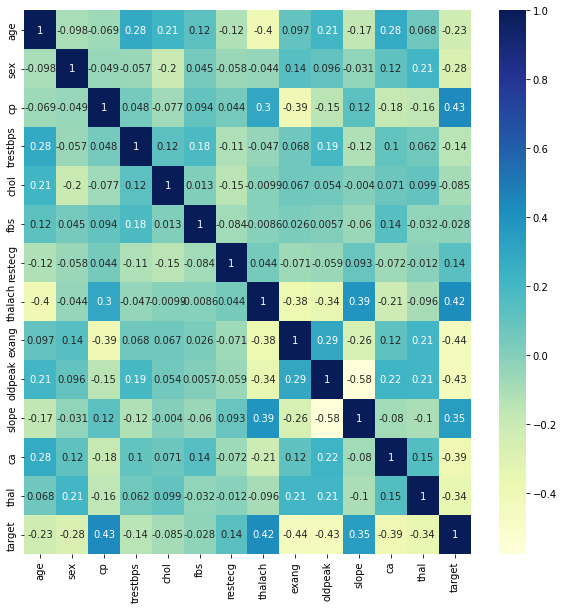

In [8]:
fig, ax = plt.pyplot.subplots(figsize = (10,10))
sns.heatmap(data.corr(), cmap = 'YlGnBu', annot = True, ax = ax)

In [9]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
print(data.shape)

(303, 14)


In [11]:
data.drop_duplicates(inplace = True)

In [12]:
print(data.shape)

(302, 14)


In [13]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from lightgbm import LGBMClassifier as lgb
from xgboost import XGBClassifier as xgb 

In [14]:
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split

In [15]:
#for i in list(data.columns):
#    print(data[i].value_counts())


In [16]:
list(data.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [17]:
df_dummy = pd.get_dummies(data, columns = ['cp',
 'slope',
 'thal',
 'ca'], drop_first = True)

In [18]:
df_dummy.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,0,150,0,2.3,1,...,1,0,0,1,0,0,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,1,...,0,0,0,0,1,0,0,0,0,0
2,41,0,130,204,0,0,172,0,1.4,1,...,0,0,1,0,1,0,0,0,0,0
3,56,1,120,236,0,1,178,0,0.8,1,...,0,0,1,0,1,0,0,0,0,0
4,57,0,120,354,0,1,163,1,0.6,1,...,0,0,1,0,1,0,0,0,0,0


In [19]:
X = df_dummy.drop('target',axis = 1)
y = df_dummy.target

In [20]:
scale = SS().fit(X)

In [21]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42,stratify = y)

In [22]:
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [23]:
X_train[1]

array([ 1.2819107 ,  0.68265615,  1.61953226, -0.00967722, -0.41844626,
        0.90165655, -1.29319009,  1.43195847, -0.8995441 ,  2.24499443,
       -0.63098982, -0.28711892,  1.07570575, -0.93582926,  3.9721251 ,
       -1.09744228, -0.79525621, -0.52369992, -0.37939346,  3.75499667,
       -0.11585689])

In [24]:
LogR = LR().fit(X_train,y_train)
RF = rfc().fit(X_train,y_train)
DT = dtc().fit(X_train,y_train)
LGB = lgb().fit(X_train,y_train)
XGB = xgb().fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:29:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
from sklearn.metrics import confusion_matrix, classification_report 
#Logistic Regression
y_lr = LogR.predict(X_test)
print(confusion_matrix(y_test, y_lr))
print(classification_report(y_test,y_lr))

[[23  5]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



[[18 10]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.74      0.85      0.79        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



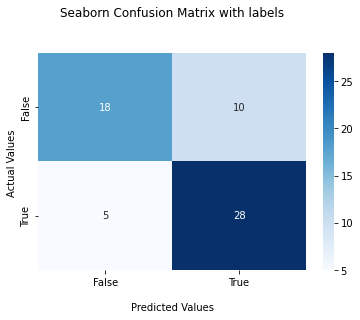

In [26]:
#DecissionTreeClassifier
y_dt = DT.predict(X_test)
print(confusion_matrix(y_test, y_dt))

ax = sns.heatmap(confusion_matrix(y_test, y_dt), annot = True, cmap = 'Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

print(classification_report(y_test,y_dt))

[[20  8]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



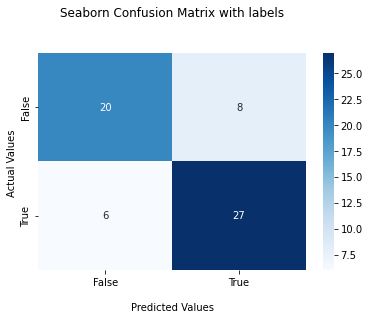

In [27]:
#RandomForestClassifier
y_rf = RF.predict(X_test)
print(confusion_matrix(y_test, y_rf))

ax = sns.heatmap(confusion_matrix(y_test, y_rf), annot = True, cmap = 'Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

print(classification_report(y_test,y_rf))

[[18 10]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        28
           1       0.71      0.76      0.74        33

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



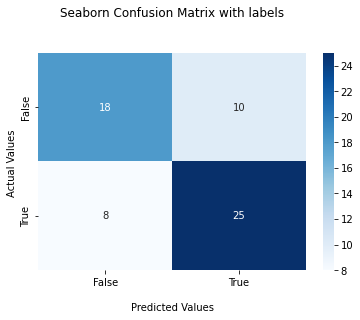

In [28]:
#LightGBM
y_lgb = LGB.predict(X_test)
print(confusion_matrix(y_test, y_lgb))

ax = sns.heatmap(confusion_matrix(y_test, y_lgb), annot = True, cmap = 'Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

print(classification_report(y_test,y_lgb))

[[16 12]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        28
           1       0.68      0.76      0.71        33

    accuracy                           0.67        61
   macro avg       0.67      0.66      0.66        61
weighted avg       0.67      0.67      0.67        61



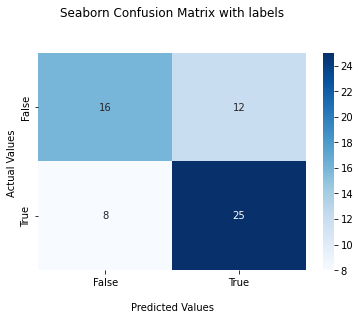

In [29]:
#XGBoost
y_xgb = XGB.predict(X_test)
print(confusion_matrix(y_test, y_xgb))

ax = sns.heatmap(confusion_matrix(y_test, y_xgb), annot = True, cmap = 'Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

print(classification_report(y_test,y_xgb))

In [30]:
# HyperParameter Tunning
from sklearn.model_selection import GridSearchCV

param = {'n_estimators' : (100,200,300,500),
          'min_samples_split' : (2,3,4,5,6),
          'max_features' : ('auto','sqrt','log2')}

RFC = rfc()
gsv = GridSearchCV(estimator = RFC, param_grid = param, cv = 4,n_jobs = -1, verbose =4)

gsv.fit(X_train,y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   24.2s


[CV] max_features=auto, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=auto, min_samples_split=2, n_estimators=100, score=0.770, total=   0.3s
[CV] max_features=auto, min_samples_split=2, n_estimators=200 ........
[CV]  max_features=auto, min_samples_split=2, n_estimators=200, score=0.754, total=   0.7s
[CV] max_features=auto, min_samples_split=2, n_estimators=300 ........
[CV]  max_features=auto, min_samples_split=2, n_estimators=300, score=0.721, total=   1.0s
[CV] max_features=auto, min_samples_split=2, n_estimators=500 ........
[CV]  max_features=auto, min_samples_split=2, n_estimators=500, score=0.738, total=   1.8s
[CV] max_features=auto, min_samples_split=3, n_estimators=100 ........
[CV]  max_features=auto, min_samples_split=3, n_estimators=100, score=0.738, total=   0.4s
[CV] max_features=auto, min_samples_split=3, n_estimators=200 ........
[CV]  max_features=auto, min_samples_split=3, n_estimators=200, score=0.721, total=   0.7s
[CV] max_features=auto, min_

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.0min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_split': (2, 3, 4, 5, 6),
                         'n_estimators': (100, 200, 300, 500)},
             verbose=4)

In [31]:
gsv.best_params_, gsv.best_score_

({'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100},
 0.8133879781420765)

In [32]:
RFC_Best = gsv.best_estimator_.fit(X_train,y_train)
yhat_best = RFC_Best.predict(X_test)

[[19  9]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



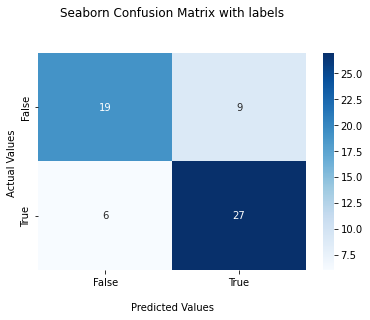

In [33]:
print(confusion_matrix(y_test, yhat_best))

ax = sns.heatmap(confusion_matrix(y_test, yhat_best), annot = True, cmap = 'Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

print(classification_report(y_test,yhat_best))